# 4. Noise Reduction in NDVI Timeseries
*Written by Men Vuthy, 2021*

---

**Import packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data
DF_NDVI = pd.read_csv('output/2/timeseries/timeseries_ndvi.csv')

**Remove outlier using Hamper Filter**

In [3]:
def hampel_filter_forloop(input_series, window_size, n_sigmas=1):
    
    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 # scale factor for Gaussian distribution
    
    indices = []
    
    # possibly use np.nanmedian 
    for i in range((window_size),(n - window_size)):
        x0 = np.median(input_series[(i - window_size):(i + window_size)])
        S0 = k * np.median(np.abs(input_series[(i - window_size):(i + window_size)] - x0))
        if (np.abs(input_series[i] - x0) > n_sigmas * S0):
            new_series[i] = x0
            indices.append(i)
    
    return new_series, indices

In [4]:
# Prepare input for hamper filter
HF_input = np.array(DF_NDVI.T)

In [5]:
result = []

for i in range(len(DF_NDVI.T)):
    res = hampel_filter_forloop(HF_input[i], window_size=5, n_sigmas=2)
    result.append(res[0])

In [6]:
NDVI_HF = pd.DataFrame(result).T

In [7]:
NDVI_HF.columns = DF_NDVI.columns

**Smoothen data using Moving Average method**

In [8]:
NDVI_MA = []

for i in range(len(NDVI_HF.columns)):
    column = NDVI_HF.iloc[:,i:(i+1)]
    mvg_avg = column.rolling(window=5).mean()
    NDVI_MA.append(mvg_avg)

In [9]:
NDVI_MA = np.array(NDVI_MA)

In [10]:
# In order to export, write requires an array of shape (band, row, col). so we have to reshape the axis
NDVI_MA = np.moveaxis(NDVI_MA, [0, 1, 2], [2, 1, 0])
NDVI_MA.shape

(1, 69, 192289)

In [11]:
NDVI_MA = pd.DataFrame(NDVI_MA[0])
NDVI_MA.columns = NDVI_HF.columns

**Plot result**

In [12]:
i = 5000 # column number or pixel numer

# Create data frame
j = i+1
noised_data = NDVI_HF.iloc[:,i:j]
smooth_data = NDVI_MA.iloc[:,i:j]
df = pd.concat([noised_data, smooth_data], axis=1)

Text(0.5, 1.0, 'ndvi_2010-2012')

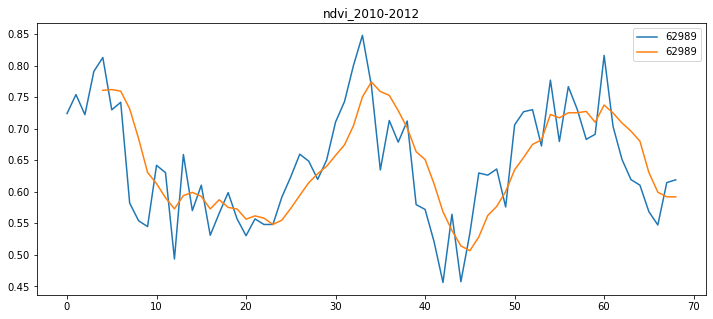

In [13]:
# Plot between noised and smoothed ndvi
fig, ax = plt.subplots(figsize=(12,5))
ax = df.plot(ax=ax)
ax.set_title('ndvi_2010-2012')

**Save result**

In [14]:
NDVI_MA.to_csv('output/3/no_noise_data/no_noise_ndvi.csv', index = False)

---